<a href="https://colab.research.google.com/github/emanuel379/Regressao---II/blob/main/P1_SME0823_Modelos_de_Regress%C3%A3o_e_Aprendizado_Supervisionado_II_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nome:** Emanuel Victor da Silva Favorato

**Número USP:** 12558151

In [ ]:
install.packages("ggplot2")
install.packages("pscl")
install.packages("boot")
install.packages("MASS")
install.packages("GGally")
install.packages("lmtest")
install.packages("gridExtra")

require(ggplot2)
require(pscl)
require(boot)
require(MASS)
require(GGally)
require(lmtest)
require(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Os biólogos da vida selvagem querem modelar quantos peixes estão sendo capturados pelos pescadores em um parque estadual. Os visitantes são questionados sobre quanto tempo permaneceram, quantas pessoas estavam no grupo, se havia crianças no grupo e quantos peixes foram pescados. Alguns visitantes não pescam, mas não há dados sobre se uma pessoa pescou ou não. Alguns visitantes que pescaram não pescaram nenhum peixe, portanto há excesso de zeros nos dados por causa das pessoas que não pescaram.

Os dados estão disponivei em https://stats.idre.ucla.edu/stat/data/fish.csv
e mais detalhes acerca dos dados e das variáveis são disponiveis em https://stats.oarc.ucla.edu/r/dae/zinb/

Para esses dados proponha um modelo de regressão de contagem mais apropriado e
interprete seus resultados seguindo o seguinte roteiro


**a)** Desenvolva uma análise descritiva

In [ ]:
df <- read.csv("https://stats.idre.ucla.edu/stat/data/fish.csv")
df <- within(df, {
    nofish <- factor(nofish)
    livebait <- factor(livebait)
    camper <- factor(camper)
})

df

nofish,livebait,camper,persons,child,xb,zg,count
<fct>,<fct>,<fct>,<int>,<int>,<dbl>,<dbl>,<int>
1,0,0,1,0,-0.89631456,3.050404787,0
0,1,1,1,0,-0.55834496,1.746148944,0
0,1,0,1,0,-0.40173101,0.279938877,0
0,1,1,2,1,-0.95629811,-0.601525664,0
0,1,0,1,0,0.43689096,0.527709126,1
0,1,1,4,2,1.39448547,-0.707534790,0
0,1,0,3,1,0.18471675,-3.398022175,0
0,1,0,4,3,2.32910657,-5.450901508,0
1,0,1,3,2,0.18838648,-1.527417779,0


In [ ]:
# Fazendo alguns reajustes nos dados

# Carregando a biblioteca statats
library(stats)

# Convertendo variáveis para numéricas
df$count <- as.numeric(as.character(df$count))

# Removendo colunas com dados Nan e inf
df <- df[complete.cases(df), ]

In [ ]:
summary(df)

 nofish  livebait camper     persons          child             xb           
 0:176   0: 34    0:103   Min.   :1.000   Min.   :0.000   Min.   :-3.275050  
 1: 74   1:216    1:147   1st Qu.:2.000   1st Qu.:0.000   1st Qu.: 0.008267  
                          Median :2.000   Median :0.000   Median : 0.954550  
                          Mean   :2.528   Mean   :0.684   Mean   : 0.973796  
                          3rd Qu.:4.000   3rd Qu.:1.000   3rd Qu.: 1.963855  
                          Max.   :4.000   Max.   :3.000   Max.   : 5.352674  
       zg              count        
 Min.   :-5.6259   Min.   :  0.000  
 1st Qu.:-1.2527   1st Qu.:  0.000  
 Median : 0.6051   Median :  0.000  
 Mean   : 0.2523   Mean   :  3.296  
 3rd Qu.: 1.9932   3rd Qu.:  2.000  
 Max.   : 4.2632   Max.   :149.000  

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 142 rows containing non-finite outside the scale range (`stat_bin()`).”


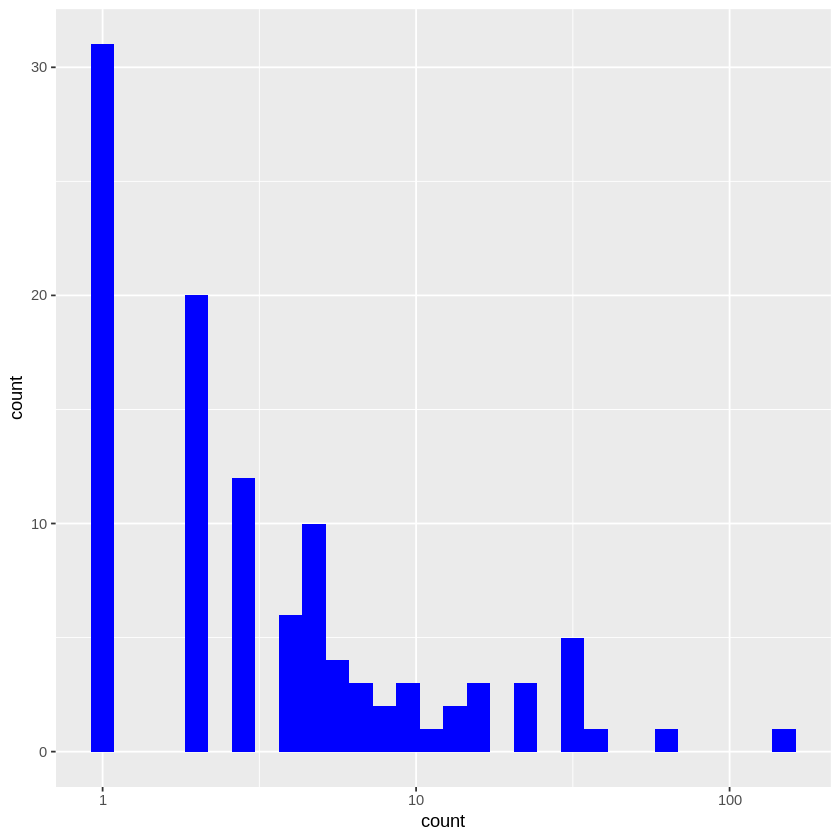

In [ ]:
# Observando as frequências com que os peixes foram capturados na escala log10

ggplot(df, aes(count)) +
  geom_histogram(fill = "blue") +
  scale_x_log10()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


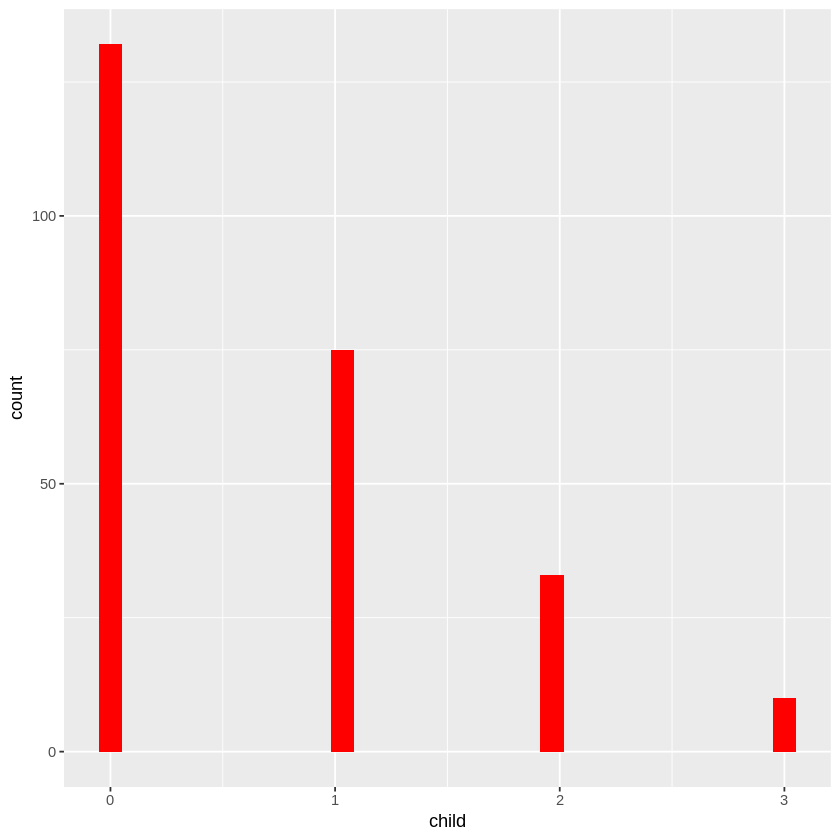

In [ ]:
# Observando as frequências para a quantidade de crianças por grupo

ggplot(df, aes(child)) +
  geom_histogram(fill = "red")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


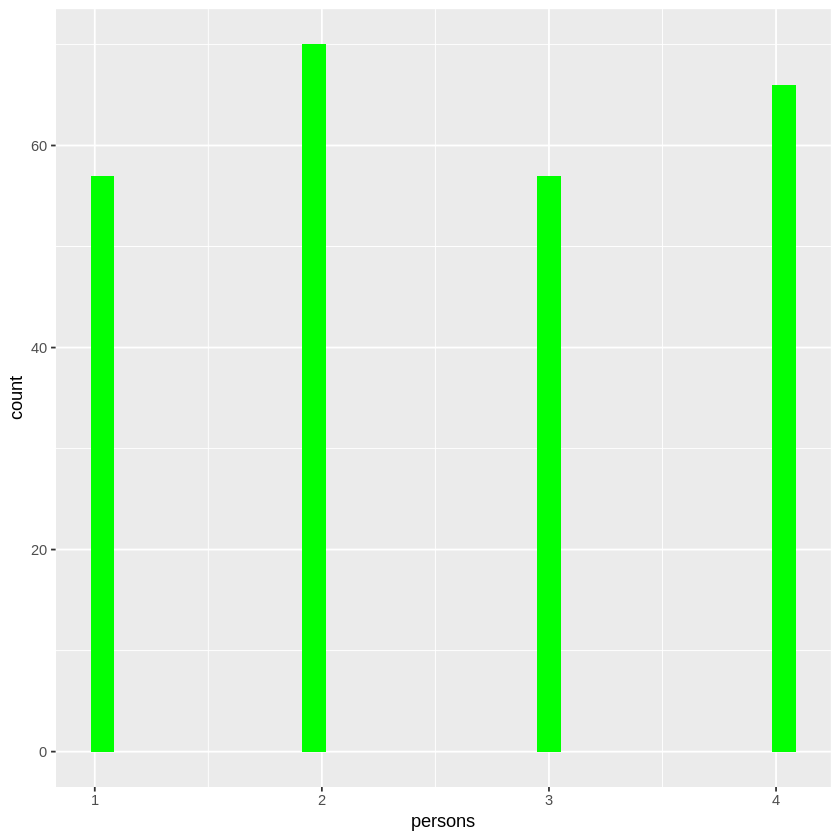

In [ ]:
# Observando as frequências para a quantidade de pessoas por grupo

ggplot(df, aes(persons)) +
  geom_histogram(fill = "green")

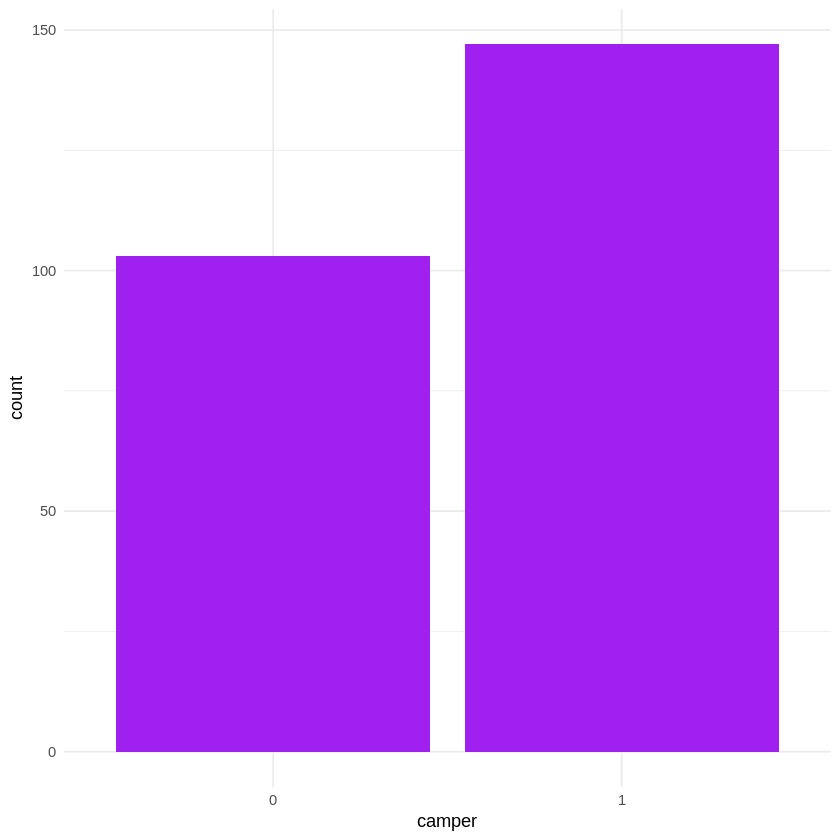

In [ ]:
# Gráfico de barras para a variável categórica 'camper'

ggplot(df, aes(x = camper)) +
  geom_bar(fill = "purple") +
  theme_minimal()

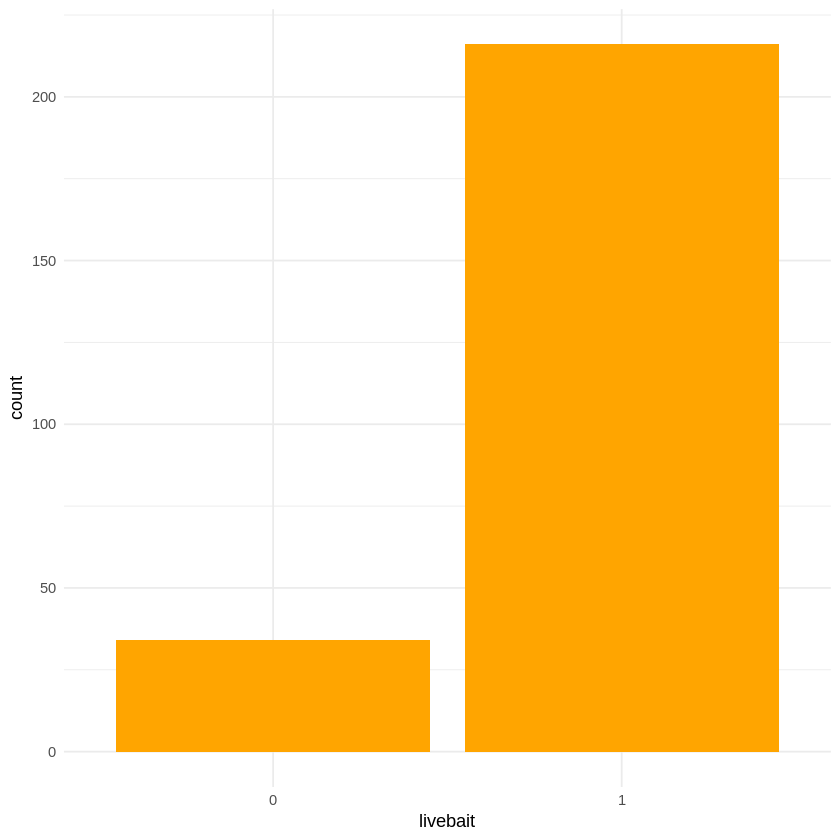

In [ ]:
# Gráfico de barras para a variável categórica 'livebait'

ggplot(df, aes(x = livebait)) +
  geom_bar(fill = "orange") +
  theme_minimal()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


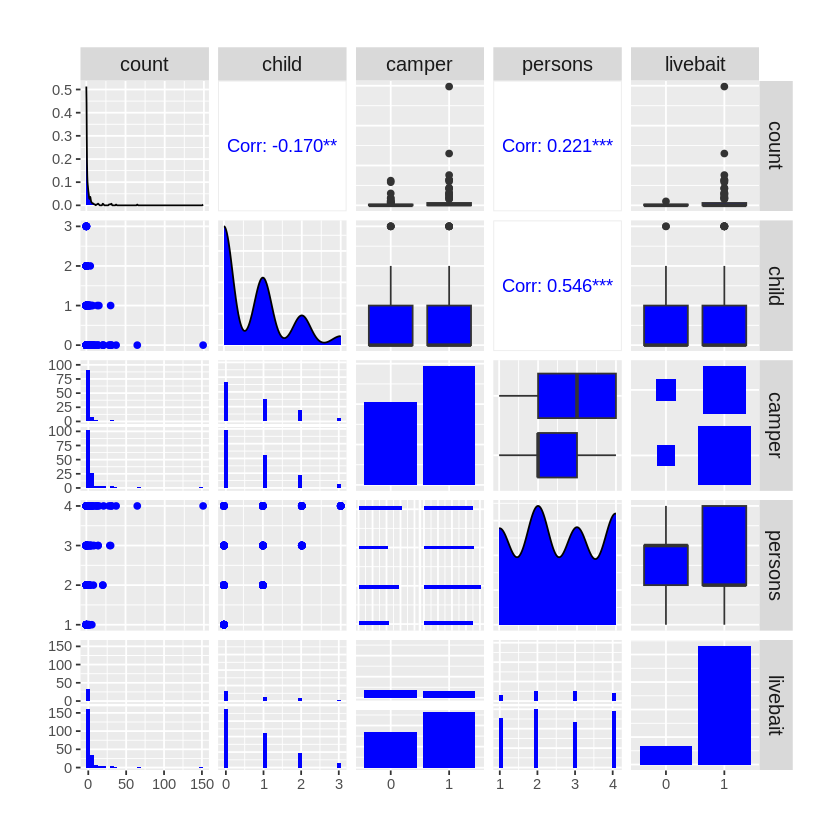

In [ ]:
# Criando uma matriz de gráficos de dispersão com cor azul e aumentando o tamanho da imagem

ggpairs(df,
        columns = c('count', 'child', 'camper', 'persons', 'livebait'),
        mapping = aes(color = I("blue"))) +
  theme(
    plot.title = element_text(size = 14, face = "bold"),
    plot.margin = unit(c(1,1,1,1), "cm"),
    strip.text = element_text(size = 12)
  )

Como é possível observar, existe um excesso de zeros na variável resposta (count). Também é possível observar que não há uma relação clara entre as covariáveis com base na correlação linear.

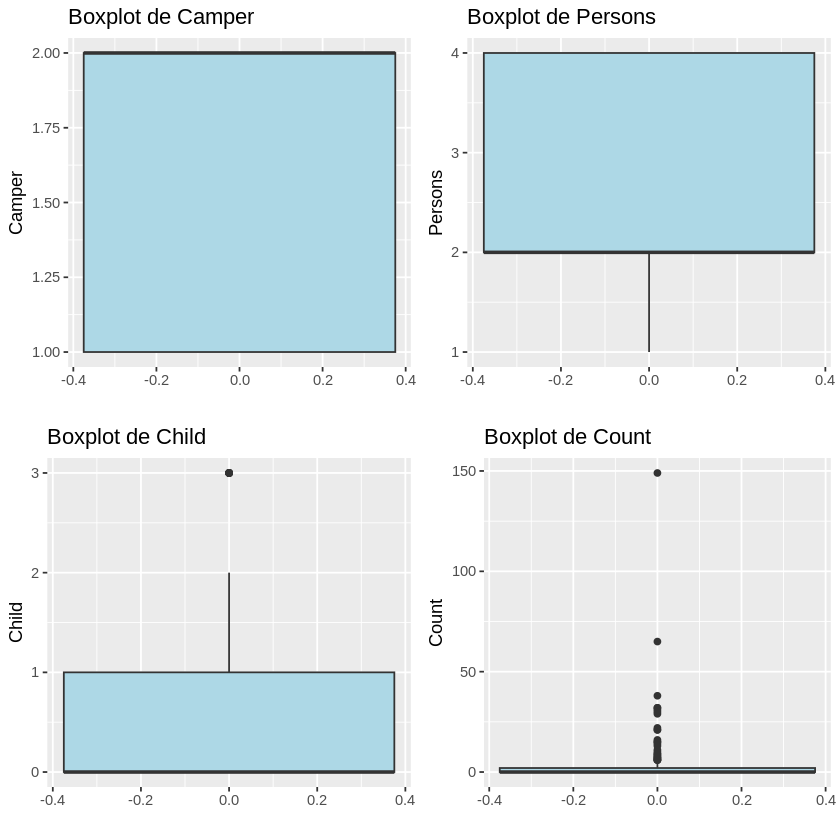

In [ ]:
# Boxplot para a variável 'camper'
p1 <- ggplot(df, aes(y = as.numeric(camper))) +
  geom_boxplot(fill = "lightblue") +
  labs(title = "Boxplot de Camper", y = "Camper", x = "")

# Boxplot para a variável 'persons'
p2 <- ggplot(df, aes(y = persons)) +
  geom_boxplot(fill = "lightblue") +
  labs(title = "Boxplot de Persons", y = "Persons", x = "")

# Boxplot para a variável 'child'
p3 <- ggplot(df, aes(y = child)) +
  geom_boxplot(fill = "lightblue") +
  labs(title = "Boxplot de Child", y = "Child", x = "")

# Boxplot para a variável 'count'
p4 <- ggplot(df, aes(y = count)) +
  geom_boxplot(fill = "lightblue") +
  labs(title = "Boxplot de Count", y = "Count", x = "")

# Organizar os gráficos em uma única visualização
grid.arrange(p1, p2, p3, p4, ncol = 2)

Como é possível observar, a análise de boxplot para a variável count é bastante imprecisa devido ao excesso de outliers e outsiders.

Vamos agora modelar esses dados com base nas informações obtidas.

**b)** Ajuste um modelo de regressão Poisson e avalie o modelo

# Modelo Poisson

In [ ]:
# Regressão de Poisson
poisson <- glm(count ~ child + camper + persons + livebait, data = df, family = 'poisson')

# Sumário do modelo
summary(poisson)


Call:
glm(formula = count ~ child + camper + persons + livebait, family = "poisson", 
    data = df)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.39007    0.26490 -12.797  < 2e-16 ***
child       -1.70993    0.08140 -21.006  < 2e-16 ***
camper1      0.80009    0.08947   8.943  < 2e-16 ***
persons      1.07396    0.03900  27.534  < 2e-16 ***
livebait1    1.66967    0.23318   7.160 8.05e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 2958.4  on 249  degrees of freedom
Residual deviance: 1246.9  on 245  degrees of freedom
AIC: 1594

Number of Fisher Scoring iterations: 6


integer(0)

integer(0)

integer(0)

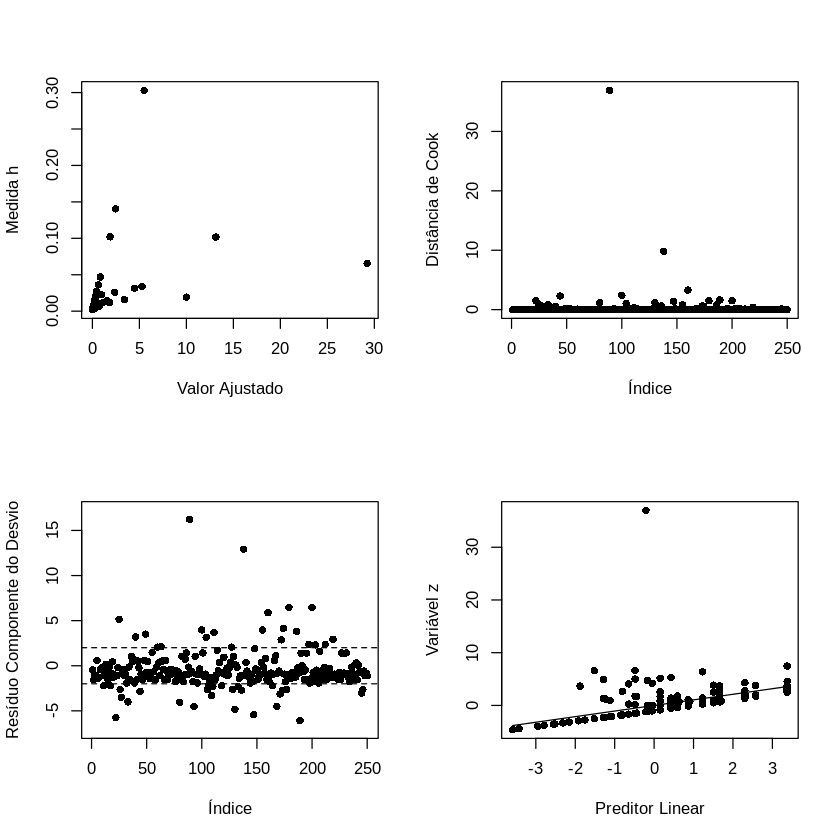

In [ ]:
# Variáveis utilizadas na função de diagnóstico
fit.model <- poisson  # Modelo Poisson ajustado
X <- model.matrix(fit.model)  # Matriz de design do modelo ajustado
n <- nrow(X)  # Número de observações
p <- ncol(X)  # Número de preditores
w <- fit.model$weights  # Pesos extraídos do modelo Poisson
W <- diag(w)  # Matriz diagonal dos pesos

# Cálculo da matriz H (alavancagem) usando a multiplicação correta de matrizes
H <- solve(t(X) %*% W %*% X)
H <- sqrt(W) %*% X %*% H %*% t(X) %*% sqrt(W)
h <- diag(H)  # Alavancagem de cada observação

# Cálculo dos resíduos padronizados (Pearson e Desvio)
ts <- resid(fit.model, type = "pearson") / sqrt(1 - h)  # Resíduos de Pearson padronizados
td <- resid(fit.model, type = "deviance") / sqrt(1 - h)  # Resíduos de desvio padronizados

# Cálculo da distância de Cook para avaliar a influência dos pontos
di <- (h / (1 - h)) * (ts^2)  # Distância de Cook

# Configuração da janela de gráficos para 2x2
par(mfrow = c(2, 2))

# Gráfico de valores ajustados vs. alavancagem
plot(fitted(fit.model), h, xlab = "Valor Ajustado", ylab = "Medida h", pch = 16)
identify(fitted(fit.model), h, n = 3)  # Descomente esta linha para identificar pontos influentes

# Gráfico da distância de Cook
plot(di, xlab = "Índice", ylab = "Distância de Cook", pch = 16)
identify(di, n = 3)  # Descomente esta linha para identificar pontos influentes

# Gráfico dos resíduos do desvio
a <- min(td)
b <- max(td)
plot(td, xlab = "Índice", ylab = "Resíduo Componente do Desvio", ylim = c(a - 1, b + 1), pch = 16)
abline(2, 0, lty = 2)  # Linha limite superior para os resíduos (2)
abline(-2, 0, lty = 2)  # Linha limite inferior para os resíduos (-2)
identify(td, n = 3)  # Descomente esta linha para identificar pontos influentes

# Gráfico do preditor linear vs. variável z
eta <- predict(fit.model)
z <- eta + resid(fit.model, type = "pearson") / sqrt(w)
plot(predict(fit.model), z, xlab = "Preditor Linear", ylab = "Variável z", pch = 16)
lines(smooth.spline(predict(fit.model), z, df = 2))  # Linha suavizada

# Resetando o layout da janela de gráficos para o padrão 1x1
par(mfrow = c(1, 1))

É possível observar que, para o modelo Poisson, todas as preditoras são significativas para a análise do modelo(p-valor < 0.05), também é possível observar a grande quantidade de observações cujos resíduos não respeitam os pressupostos de normalidade dos erros, bem como vários valores discrepantes e pontos de alavanca, o que nos trás indícios de que o modelo poisson não nos retorna um bom ajuste para os dados amostrais.

**c)** Ajuste uma regressão binomial negativa e avalie o modelo

# Modelo Binomial Negativo

In [ ]:
# Regressão Binomial Negativa
nb_model <- glm.nb(count ~ child + persons + camper + livebait, data = df)

# Sumário do modelo
summary(nb_model)


Call:
glm.nb(formula = count ~ child + persons + camper + livebait, 
    data = df, init.theta = 0.5155059824, link = log)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.9760     0.4849  -6.138 8.37e-10 ***
child        -1.8009     0.1839  -9.791  < 2e-16 ***
persons       1.0618     0.1108   9.581  < 2e-16 ***
camper1       0.5179     0.2306   2.245 0.024752 *  
livebait1     1.5379     0.4035   3.812 0.000138 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(0.5155) family taken to be 1)

    Null deviance: 423.64  on 249  degrees of freedom
Residual deviance: 209.88  on 245  degrees of freedom
AIC: 809.16

Number of Fisher Scoring iterations: 1


              Theta:  0.5155 
          Std. Err.:  0.0811 

 2 x log-likelihood:  -797.1610 

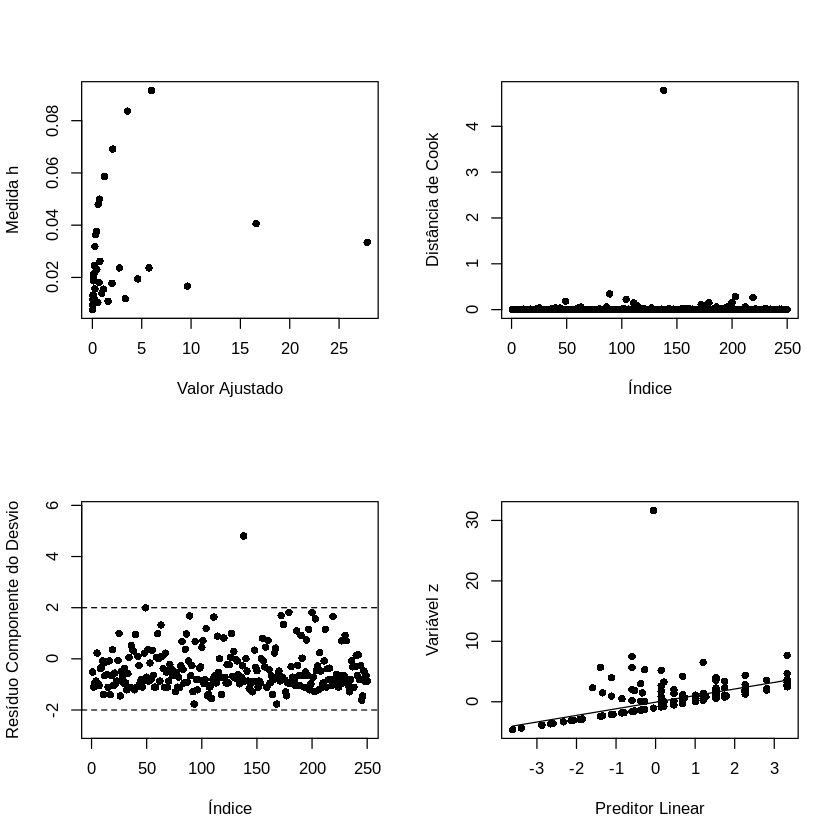

In [ ]:
# Variáveis para diagnóstico do modelo
fit.model <- nb_model  # Modelo binomial negativo ajustado
X <- model.matrix(fit.model)  # Matriz de design do modelo ajustado
n <- nrow(X)  # Número de observações
p <- ncol(X)  # Número de preditores
fi <- fit.model$theta  # Parâmetro de dispersão (theta) do modelo binomial negativo
w <- fi * fitted(fit.model) / (fi + fitted(fit.model))  # Pesos baseados nos valores ajustados
W <- diag(w)  # Matriz diagonal dos pesos

# Cálculo da matriz H (alavancagem)
H <- solve(t(X) %*% W %*% X)
H <- sqrt(W) %*% X %*% H %*% t(X) %*% sqrt(W)
h <- diag(H)  # Alavancagem de cada observação

# Cálculo dos resíduos padronizados
ts <- resid(fit.model, type = "pearson") / sqrt(1 - h)  # Resíduos de Pearson padronizados
td <- resid(fit.model, type = "deviance") / sqrt(1 - h)  # Resíduos de desvio padronizados
di <- (h / (1 - h)) * (ts^2)  # Distância de Cook para avaliar a influência

# Plotando os gráficos de diagnóstico
par(mfrow = c(2, 2))  # Configura o layout da janela de gráficos com 2x2

# Gráfico de alavancagem (valores ajustados vs. alavancagem)
plot(fitted(fit.model), h, xlab = "Valor Ajustado", ylab = "Medida h", pch = 16)

# Gráfico de distância de Cook (influência dos pontos)
plot(di, xlab = "Índice", ylab = "Distância de Cook", pch = 16)

# Gráfico de resíduos de desvio (distribuição dos resíduos)
a <- max(td)
b <- min(td)
plot(td, xlab = "Índice", ylab = "Resíduo Componente do Desvio", ylim = c(b - 1, a + 1), pch = 16)
abline(2, 0, lty = 2)  # Linha limite superior (resíduo de +2)
abline(-2, 0, lty = 2)  # Linha limite inferior (resíduo de -2)

# Gráfico do preditor linear vs. variável z (para detectar mau ajuste)
eta <- predict(fit.model)
z <- eta + resid(fit.model, type = "pearson") / sqrt(w)
plot(predict(fit.model), z, xlab = "Preditor Linear", ylab = "Variável z", pch = 16)
lines(smooth.spline(predict(fit.model), z, df = 2))  # Linha suavizada

# Resetando o layout dos gráficos para 1x1
par(mfrow = c(1, 1))

É possível observar um modelo com ajuste aos dados fornecidos, onde todas as covariáveis são significativas, com a maioria absoluta dos resíduos dentro dos limites de confiança, atendendo aos pressupostos para os erros, também é possível observar uma menor quantidade de pontos influentes, resultando em um melhor ajuste por parte do modelo proposto.

**d)** Ajuste uma regressão binomial negativa inflacionada de zeros e avalie o modelo em relação ao modelo binomial negativo

# Modelo binomial negativo inflado de zeros

In [ ]:
# Ajustando uma regressão binomial negativa com inflação de zeros
zero_inflated_nb <- zeroinfl(count ~ child + camper + persons + livebait| child + camper + persons + livebait,
                             data = df, dist = "negbin")


# Sumário do modelo
summary(zero_inflated_nb)


Call:
zeroinfl(formula = count ~ child + camper + persons + livebait | child + 
    camper + persons + livebait, data = df, dist = "negbin")

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-0.7617 -0.5822 -0.3813  0.0251 15.5582 

Count model coefficients (negbin with log link):
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -3.0322     0.4729  -6.411 1.44e-10 ***
child        -1.3227     0.2368  -5.586 2.33e-08 ***
camper1       0.2561     0.2411   1.062  0.28807    
persons       1.0865     0.1086  10.004  < 2e-16 ***
livebait1     1.6496     0.4102   4.021 5.78e-05 ***
Log(theta)   -0.4732     0.1624  -2.914  0.00357 ** 

Zero-inflation model coefficients (binomial with logit link):
            Estimate Std. Error z value Pr(>|z|)
(Intercept) -16.7115    69.2186  -0.241    0.809
child        11.7363    61.5183   0.191    0.849
camper1     -12.1236    61.5570  -0.197    0.844
persons       0.3610     0.7378   0.489    0.625
livebait1     4.0648    21.

integer(0)

integer(0)

integer(0)

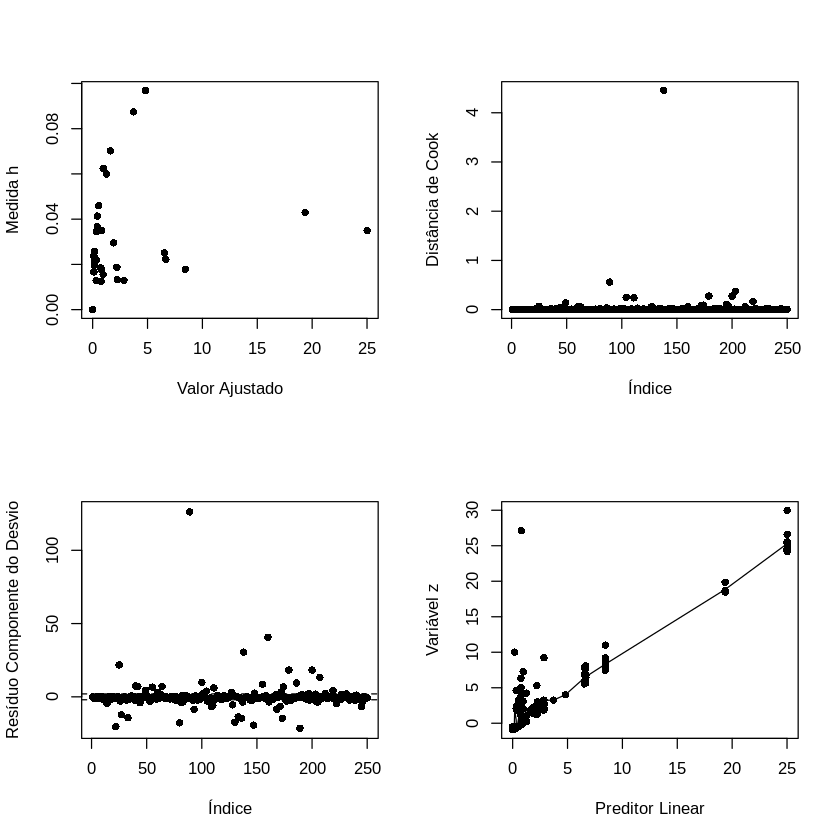

In [ ]:
# Variáveis utilizadas na função de diagnóstico
fit.model <- zero_inflated_nb  # Modelo Binomial Negativo inflado de zeros ajustado
X <- model.matrix(fit.model)  # Matriz de design do modelo ajustado
n <- nrow(X)  # Número de observações
p <- ncol(X)  # Número de preditores
fi <- fit.model$theta  # Parâmetro theta da parte binomial negativa do modelo
w <- fi * fitted(fit.model) / (fi + fitted(fit.model))  # Pesos
W <- diag(w)  # Matriz diagonal dos pesos

# Cálculo da matriz H (alavancagem) usando a multiplicação correta de matrizes
H <- solve(t(X) %*% W %*% X)
H <- sqrt(W) %*% X %*% H %*% t(X) %*% sqrt(W)
h <- diag(H)  # Alavancagem de cada observação

# Cálculo dos resíduos padronizados (Pearson e Desvio)
ts <- resid(fit.model, type = "pearson") / sqrt(1 - h)  # Resíduos de Pearson padronizados
td <- resid(fit.model, type = "response") / sqrt(1 - h)  # Resíduos de resposta padronizados

# Cálculo da distância de Cook para avaliar a influência dos pontos
di <- (h / (1 - h)) * (ts^2)  # Distância de Cook

# Configuração da janela de gráficos para 2x2
par(mfrow = c(2, 2))

# Gráfico de valores ajustados vs. alavancagem
plot(fitted(fit.model), h, xlab = "Valor Ajustado", ylab = "Medida h", pch = 16)
identify(fitted(fit.model), h, n = 3)  # Descomente esta linha para identificar pontos influentes

# Gráfico da distância de Cook
plot(di, xlab = "Índice", ylab = "Distância de Cook", pch = 16)
identify(di, n = 3)  # Descomente esta linha para identificar pontos influentes

# Gráfico dos resíduos do desvio
a <- min(td)
b <- max(td)
plot(td, xlab = "Índice", ylab = "Resíduo Componente do Desvio", ylim = c(a - 1, b + 1), pch = 16)
abline(2, 0, lty = 2)  # Linha limite superior para os resíduos (2)
abline(-2, 0, lty = 2)  # Linha limite inferior para os resíduos (-2)
identify(td, n = 3)  # Descomente esta linha para identificar pontos influentes

# Gráfico do preditor linear vs. variável z
eta <- predict(fit.model)
z <- eta + resid(fit.model, type = "pearson") / sqrt(w)
plot(predict(fit.model), z, xlab = "Preditor Linear", ylab = "Variável z", pch = 16)
lines(smooth.spline(predict(fit.model), z, df = 2))  # Linha suavizada

# Resetando o layout da janela de gráficos para o padrão 1x1
par(mfrow = c(1, 1))

No caso binomial negativo com inflação de zeros, observamos que os resíduos estão bem menos comportados que no modelo binomial tradicional, entretanto, também é possível observar que o ajuste do preditor linear aos dados se dá de forma mais assertiva, além de ser possível observar número semelhante de pontos de alavanca. Também é possível observar que a covariável camper não é significativa ao nível de 5% de significância, sendo que sua remoção em pouco afetaria na adequabilidade do modelo, já para a inflação de zeros, temos que nenhuma das covariáveis foi suficientemente capaz de explicar o excesso de zeros na resposta.

**e)** Conclua escolhendo o melhor modelo justificando sua escolha e interprete os resultados do modelo.



# Análise dos ajustes

**AIC**

In [ ]:
AIC(poisson)
AIC(nb_model)
AIC(zero_inflated_nb)

[1] 1593.955

[1] 809.1614

[1] 798.2896

De acordo com o AIC, temos que o modelo binomial negativo inflacionado de zeros foi o que melhor se adequou aos dados.

**Teste da razão de verossimilhança**

In [ ]:
# Análise de desvio Poisson vs Binomial Negativa
anova(poisson, nb_model, test = "Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,245,1246.8900,NA,NA,NA
2,245,209.8808,0,1037.009,NA


In [ ]:
# Teste da Razão de Verossimilhança Poisson vs Binomial Negativa
lrtest(poisson, nb_model)

,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5,-791.9776,NA,NA,NA
2,6,-398.5807,1,786.7939,4.011853e-173


A queda expressiva no desvio residual, bem como o aumento expressivo da função log-verossimilhança, nos mostra que o modelo binomial negativo se mostrou mais eficiente que o modelo poisson, o valor-p extremamente baixo corrobora essa afirmação.

In [ ]:
# Teste da Razão de Verossimilhança Poisson vs Binomial Negativa inflada de zeros
lrtest(poisson, zero_inflated_nb)

Warning message in modelUpdate(objects[[i - 1]], objects[[i]]):
“original model was of class "glm", updated model is of class "zeroinfl"”


,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5,-791.9776,NA,NA,NA
2,11,-388.1448,6,807.6656,3.397492e-171


O valor considerávelmente mais elevado da função log-verossimilhança, nos mostra que o modelo binomial negativo com inflação de zeros é mais eficiente na modelagem dos dados que o modelo poisson, o baixo valor-p comprova a afirmação.

In [ ]:
# Teste da Razão de Verossimilhança Binomial Negativa vs Binomial Negativa inflada de zeros
lrtest(nb_model, zero_inflated_nb)

Warning message in modelUpdate(objects[[i - 1]], objects[[i]]):
“original model was of class "negbin", updated model is of class "zeroinfl"”


,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6,-398.5807,NA,NA,NA
2,11,-388.1448,5,20.87179,0.0008565041


A estatística de teste nos revela que o modelo binomial negativo inflado de zeros apresenta um melhor ajuste aos dados que a binomial negativa tradicional, apesar de uma diferença aparentemente não tão significativa no valor da função log-verossimilhança.

**Teste de vuong**

In [ ]:
# Teste da Razão de Verossimilhança Poisson vs Binomial Negativa
vuong(poisson, nb_model)

Vuong Non-Nested Hypothesis Test-Statistic: 
(test-statistic is asymptotically distributed N(0,1) under the
 null that the models are indistinguishible)
-------------------------------------------------------------
              Vuong z-statistic             H_A   p-value
Raw                   -2.758939 model2 > model1 0.0028995
AIC-corrected         -2.758939 model2 > model1 0.0028995
BIC-corrected         -2.758939 model2 > model1 0.0028995


É possível observar, com base no teste de vuong que há fortes evidências em favor da superioridade do modelo Binomial Negativo com relação à predição dos dados, quando comparado ao modelo Poisson

In [ ]:
# Teste da Razão de Verossimilhança Poisson vs Binomial Negativa inflada de zeros
vuong(poisson, zero_inflated_nb)

Vuong Non-Nested Hypothesis Test-Statistic: 
(test-statistic is asymptotically distributed N(0,1) under the
 null that the models are indistinguishible)
-------------------------------------------------------------
              Vuong z-statistic             H_A   p-value
Raw                   -2.809818 model2 > model1 0.0024785
AIC-corrected         -2.775029 model2 > model1 0.0027598
BIC-corrected         -2.713774 model2 > model1 0.0033261


Com base na análise do p-valor, o teste de vuong nos permite afirmar que o modelo Binomial Negativo com inflação de zeros é mais consistente na modelagem dos dados que o modelo Poisson.

In [ ]:
# Teste da Razão de Verossimilhança Binomial Negativa vs Binomial Negativa inflada de zeros
vuong(nb_model, zero_inflated_nb)

Vuong Non-Nested Hypothesis Test-Statistic: 
(test-statistic is asymptotically distributed N(0,1) under the
 null that the models are indistinguishible)
-------------------------------------------------------------
              Vuong z-statistic             H_A  p-value
Raw                  -2.1798839 model2 > model1 0.014633
AIC-corrected        -1.1354675 model2 > model1 0.128090
BIC-corrected         0.7034683 model1 > model2 0.240882


Para a comparação entre o modelo Binomial Negativo tradicional e o com inflação de zeros, o teste de vuong não foi capaz de identificar qual o melhor com base nas correções do AIC e BIC, apenas no modelo sem correções, que, a um nível de significância α = 5%, acabou por considerar o modelo inflacionado como sendo o melhor, tal divergência pode ser, em parte, devido ao fato de que as covariáveis inflatoras do modelo não foram suficientemente capazes de explicar o excesso de zeros na variável resposta.

**Conclusão:** em suma, observamos, com base nos critérios AIC, razão de verossimilhanças e no teste de vuong que o modelo Binomial Negativo com inflação de zeros foi o que apresentou o melhor ajuste aos dados, entretanto, é importante ponderar que essa melhoria pode não ser tão significativa quanto esperada, uma vez que as covariáveis inflatoras não foram capazes de explicar a inflação na resposta devidamente, e embora haja uma melhor adequabilidade, tal ganho pode não ser tão mais vantajoso que o de um Binomial Negativo padrão.